In [2]:
import matplotlib.pyplot as plt
import glob
import numpy as np
import os

In [3]:
images = glob.glob('./data/*.png')

In [4]:
coords = []
cls = []
countries = []
names = []
for image in images:
    name = os.path.basename(image)[:-4]
    country, coord = name.split("_")
    lat, lng = coord.split(",")
    latlng = np.array([float(lat), float(lng)])
    if latlng[1]>50:
        continue
    coords.append( latlng )
    countries.append(country)
    names.append(os.path.basename(image))
    if country not in cls:
        cls.append(country)
        
coords = np.array(coords)
countries = np.array(countries)

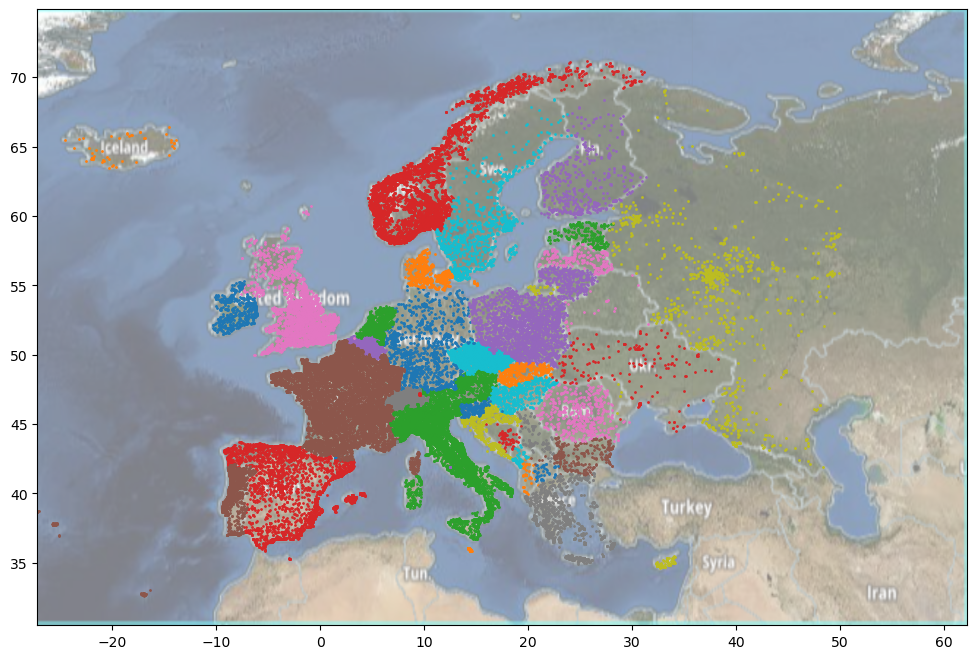

In [6]:
plt.rcParams["figure.figsize"] = (12,8)
imap = plt.imread("europe.png")
fig, ax = plt.subplots()

for c in cls:
    ax.scatter(coords[countries==c, 1], coords[countries==c, 0], label=c, s=1)
ax.imshow(imap, alpha=0.5, aspect='auto', extent=[-27.17555, 62.23576, 30.49074, 74.90111])
# ax.legend()

In [27]:
country_center = []

for c in cls:
    country_center.append(coords[countries==c].mean(0))

In [1]:

anchor_samples = [
    "AD_42.528,1.56927.png",
    "AL_41.32654,19.82209.png",
    "AT_47.73333,14.21667.png",
    "BA_43.91194,18.08083.png",
    "BE_50.78263,4.5334.png",
    "BG_42.71231,25.3329.png",
    "BY_53.0245,26.3403.png",
    "CH_46.90981,8.11206.png",
    "CY_35.119479999999996,33.28853.png",
    "CZ_49.73456,15.29297.png",
    "DE_50.39996,9.98198.png",
    "DK_55.80849,10.581669999999999.png",
    "EE_58.63053,25.55402.png",
    "ES_39.68888,-3.50281.png",
    "FI_61.929730000000006,25.15144.png",
    "FR_46.91745,2.49814.png",
    "GB_52.81773,-1.76009.png",
    "GR_37.97451,23.51769.png",
    "HR_44.655,15.95083.png",
    "HU_47.25,19.06667.png",
    "IE_53.32528000000001,-7.979439999999999.png",
    "IS_64.13267,-20.30651.png",
    "IT_43.43218,11.77323.png",
    "LI_47.17556,9.57287.png",
    "LT_55.41019,23.7299.png",
    "LU_49.64506,6.12932.png",
    "LV_57.0619,24.84465.png",
    "MC_43.74041,7.42311.png",
    "MD_47.01095,28.85176.png",
    "ME_42.39333,18.89028.png",
    "MK_41.63468,21.40268.png",
    "MT_35.94556,14.38972.png",
    "NL_52.1738,5.48497.png",
    "NO_62.20631,10.63725.png",
    "PL_51.85225,19.59197.png",
    "PT_39.66978,-8.9958.png",
    "RO_45.68811,24.97548.png",
    "RS_44.24947,20.39613.png",
    "RU_54.1766,37.8881.png",
    "SE_59.06565,15.337470000000001.png",
    "SI_46.05804,14.82515.png",
    "SK_48.56315,19.3029.png",
    "SM_43.90867,12.44808.png",
    "UA_48.57325,29.71874.png",
    "VA_41.90394,12.45401.png",
    "XK_42.54018,20.28793.png",
]

In [39]:
anchors = []
for center in country_center:
    dis = np.linalg.norm(coords-center, axis=1)
    anchors.append(coords[dis.argmin()])
    print(names[dis.argmin()])

AD_42.528,1.56927.png
AL_41.32654,19.82209.png
AT_47.73333,14.21667.png
BA_43.91194,18.08083.png
BE_50.78263,4.5334.png
BG_42.71231,25.3329.png
BY_53.0245,26.3403.png
CH_46.90981,8.11206.png
CY_35.119479999999996,33.28853.png
CZ_49.73456,15.29297.png
DE_50.39996,9.98198.png
DK_55.80849,10.581669999999999.png
EE_58.63053,25.55402.png
ES_39.68888,-3.50281.png
FI_61.929730000000006,25.15144.png
FR_46.91745,2.49814.png
GB_52.81773,-1.76009.png
GR_37.97451,23.51769.png
HR_44.655,15.95083.png
HU_47.25,19.06667.png
IE_53.32528000000001,-7.979439999999999.png
IS_64.13267,-20.30651.png
IT_43.43218,11.77323.png
LI_47.17556,9.57287.png
LT_55.41019,23.7299.png
LU_49.64506,6.12932.png
LV_57.0619,24.84465.png
MC_43.74041,7.42311.png
MD_47.01095,28.85176.png
ME_42.39333,18.89028.png
MK_41.63468,21.40268.png
MT_35.94556,14.38972.png
NL_52.1738,5.48497.png
NO_62.20631,10.63725.png
PL_51.85225,19.59197.png
PT_39.66978,-8.9958.png
RO_45.68811,24.97548.png
RS_44.24947,20.39613.png
RU_54.1766,37.8881.png
S

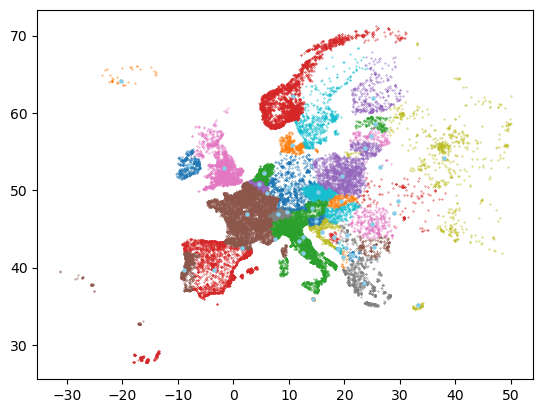

In [47]:
fig, ax = plt.subplots()
anchors = np.array(anchors)
for c in cls:
    ax.scatter(coords[countries==c, 1], coords[countries==c, 0], label=c, s=0.1)

ax.scatter(anchors[:, 1], anchors[:, 0], label=c, s=5, c='skyblue')
